<a href="https://colab.research.google.com/github/GowriShankarAllam/Tesla-Stock-Prize-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Stock Price Prediction for TSLA Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("TSLA.csv")

In [4]:
df.head()

,date,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
0,29-06-2010,1.26666,1.66666,1.16934,1.59266,281749173,23.8899,NaN,NaN
1,30-06-2010,1.71934,2.02794,1.55334,1.58866,257915884,23.8299,-0.25,NaN
2,01-07-2010,1.66666,1.72800,1.35134,1.46400,123447940,21.9600,-7.85,NaN
3,02-07-2010,1.53334,1.54000,1.24734,1.28000,77127102,19.2000,-12.57,NaN
4,06-07-2010,1.33334,1.33334,1.05534,1.07400,103189435,16.1100,-16.09,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3447 entries, 0 to 3446
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3447 non-null   object 
 1   open            3447 non-null   float64
 2   high            3447 non-null   float64
 3   low             3447 non-null   float64
 4   close           3447 non-null   float64
 5   volume          3447 non-null   int64  
 6   raw_close       3447 non-null   float64
 7   change_percent  3446 non-null   float64
 8   avg_vol_20d     3428 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 242.5+ KB


In [6]:
df.shape

(3447, 9)

In [7]:
df.describe()

,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
count,3447.000000,3447.000000,3447.000000,3447.000000,3.447000e+03,3447.000000,3446.000000,3.428000e+03
mean,72.294794,73.907311,70.588289,72.268368,9.701307e+07,306.711298,0.200255,9.696004e+07
std,102.046317,104.362138,99.557840,101.960411,7.960171e+07,290.086867,3.578102,6.354154e+07
min,1.076000,1.108660,0.998660,1.053340,1.779210e+06,15.800100,-21.060000,4.317139e+06
25%,11.000000,11.267000,10.807660,11.075930,4.645954e+07,151.140000,-1.577500,5.590126e+07
50%,17.101340,17.355460,16.800660,17.066660,8.200188e+07,234.240000,0.120000,8.936656e+07
75%,135.806667,137.496983,130.600000,135.503333,1.233300e+08,337.084950,1.927500,1.272417e+08
max,411.470000,414.496667,405.666667,409.970000,9.140814e+08,2238.750000,24.400000,3.886315e+08


In [8]:
df.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
raw_close          0
change_percent     1
avg_vol_20d       19
dtype: int64

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
open,1.000000,0.999628,0.999628,0.999229,0.104960,0.619229,-0.016961,0.144408
high,0.999628,1.000000,0.999511,0.999544,0.108604,0.621068,-0.008431,0.145712
low,0.999628,0.999511,1.000000,0.999689,0.101728,0.618285,-0.007266,0.143460
close,0.999229,0.999544,0.999689,1.000000,0.105860,0.620210,0.002210,0.145235
volume,0.104960,0.108604,0.101728,0.105860,1.000000,0.330161,0.079568,0.767333
raw_close,0.619229,0.621068,0.618285,0.620210,0.330161,1.000000,0.055009,0.409500
change_percent,-0.016961,-0.008431,-0.007266,0.002210,0.079568,0.055009,1.000000,0.040215
avg_vol_20d,0.144408,0.145712,0.143460,0.145235,0.767333,0.409500,0.040215,1.000000


In [10]:
for col in df.columns:
    figure = px.line(df[col])
    figure.update_layout(title=f'Line Plot for {col} of Tesla Stock')
    iplot(figure)

In [14]:
figure = px.line(df[['open', 'close']], title = 'Price of Tesla Stock for opening and closing')
figure.show()

In [15]:
figure = px.line(df[['high', 'low']], title = 'High and Low Price of Tesla Stock')
figure.show()

In [17]:
X = df[['high','low','open','volume']].values
y = df['close'].values

In [18]:
print(X)

[[1.66666000e+00 1.16934000e+00 1.26666000e+00 2.81749173e+08]
 [2.02794000e+00 1.55334000e+00 1.71934000e+00 2.57915884e+08]
 [1.72800000e+00 1.35134000e+00 1.66666000e+00 1.23447940e+08]
 ...
 [1.81576000e+02 1.73700000e+02 1.79990000e+02 1.07920898e+08]
 [1.80040000e+02 1.73700000e+02 1.74350000e+02 1.02129000e+08]
 [1.82730000e+02 1.74700000e+02 1.81500000e+02 8.55446440e+07]]


In [19]:
print(y)

[  1.59266   1.58866   1.464   ... 176.54    178.65    175.34   ]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [21]:
regressors = LinearRegression()

In [22]:
regressors.fit(X_train, y_train)

LinearRegression()

In [23]:
print(regressors.coef_)

[ 5.50804321e-01  9.56651337e-01 -4.97816556e-01  2.99069980e-09]


In [24]:
print(regressors.intercept_)

-0.26256863768597327


In [25]:
predicted = regressors.predict(X_test)

In [26]:
print(predicted)

[ 23.33827567  22.58718196  19.53436419 ...  28.90804417 262.59640247
  25.28205368]


In [27]:

datacol= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [28]:
datacol.head(20)

,Actual,Predicted
0,23.070000,23.338276
1,22.363340,22.587182
2,19.414000,19.534364
3,15.122000,15.039972
4,1.642000,1.427883
5,19.024000,19.624629
6,190.946667,193.294640
7,2.128660,1.887668
8,2.226660,1.995594
9,13.833340,13.771912


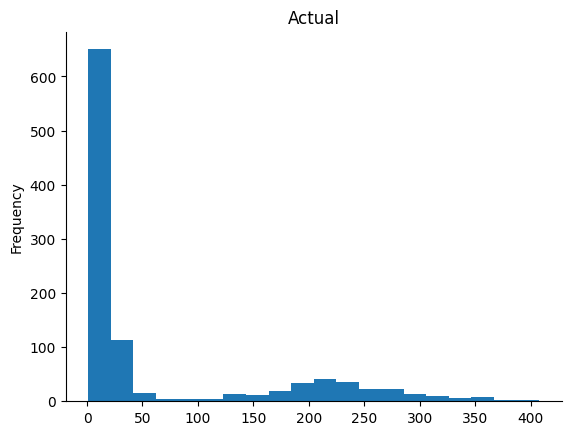

In [29]:
# Actual

from matplotlib import pyplot as plt
datacol['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

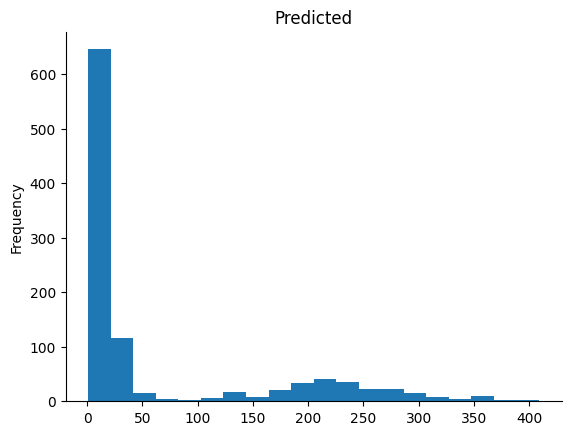

In [30]:
# Predicted

from matplotlib import pyplot as plt
datacol['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'Predicted Data'}>

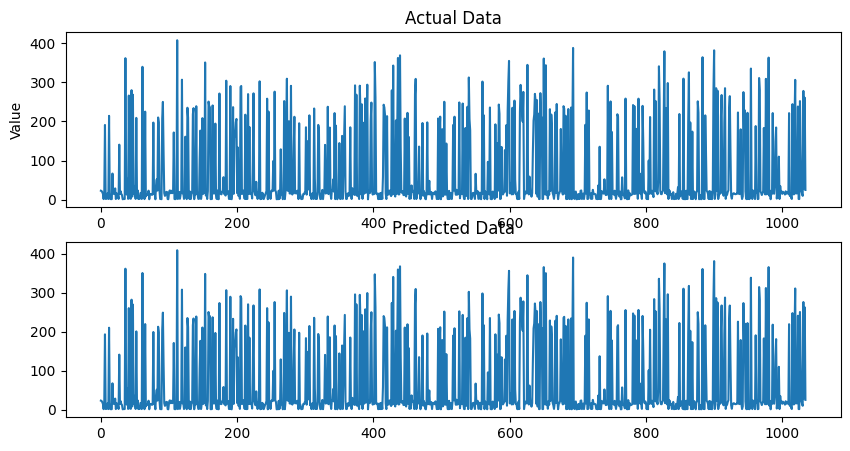

In [31]:
# prompt: Using dataframe datacol: generate a code to show respective plots from the above step that displays comparision between actual and predicted one by respective model graphs

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# Plot the actual data in the first subplot
ax1.plot(datacol['Actual'], label='Actual')
ax1.set_title('Actual Data')
ax1.set_ylabel('Value')

# Plot the predicted data in the second subplot
ax2.plot(datacol['Predicted'], label='Predicted')
ax2.set_title('Predicted Data')
ax2

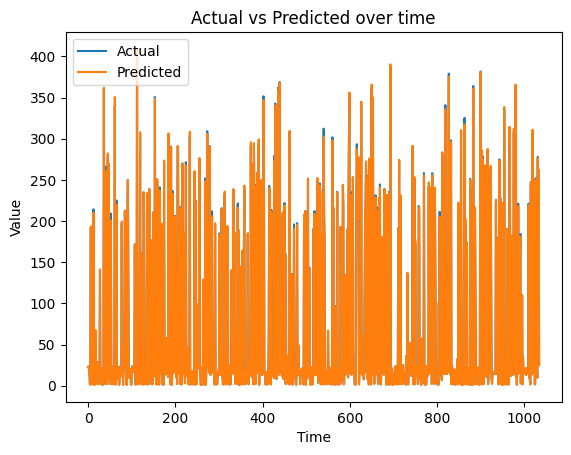

In [36]:
# Actual vs Predicted over time

import matplotlib.pyplot as plt
plt.plot(datacol['Actual'], label='Actual')
plt.plot(datacol['Predicted'], label='Predicted')
plt.title('Actual vs Predicted over time')
plt.xlabel('Time')
plt.ylabel('Value')
_ = plt.legend()

In [32]:
import math
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error(RMSE):', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error(MAE): 0.7658254989812434
Mean Squared Error(MSE): 2.518422263362195
Root Mean Squared Error(RMSE): 1.5869537685018411


In [33]:
graph = datacol.head(20)

<Axes: >

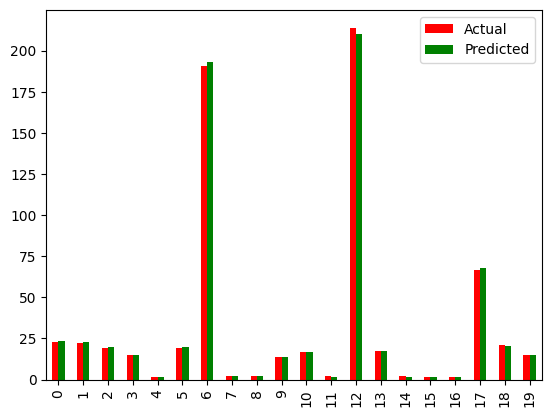

In [34]:
colors="red","Green"
graph.plot(kind='bar',color=colors)